<a href="https://colab.research.google.com/github/UWAGroves/Homework-9/blob/main/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages and link Gdrive

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import expon
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
import xarray as xr
!pip install cartopy geoviews hvplot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import hvplot.xarray
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import root_mean_squared_error
from sklearn.datasets import make_moons
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from google.colab import drive

drive.mount('/content/drive')

filedir = "/content/drive/MyDrive/"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 8.3 MB/s eta 0:00:00


Mounted at /content/drive


In [ ]:
# load data
fname = filedir + "SW_with_AOD.csv"

BSRN = pd.read_csv(fname)
BSRN

print("\nSummary statistics:")
print(df.describe())

SZA       AOD       COD  CLD_FRAC        UW         TO3  \
0      24.936783  1.172892  2.440000  0.286546  2.021502  311.419861   
1      34.865055  1.626954  4.630000  0.468832  4.859887  308.713379   
2      27.330978  1.095007  2.030000  0.301414  5.278558  293.322052   
3      20.361732  1.126541  5.500000  0.377019  4.856422  321.498199   
4      13.433228  0.725452  0.736076  0.075378  0.644262  295.448975   
...          ...       ...       ...       ...       ...         ...   
35219  37.315063  0.181112  2.360000  0.071185  2.312875  268.948242   
35220  64.573303  0.258045  0.392416  0.060352  0.893602  328.640442   
35221  61.829556  0.138252  0.233040  0.033619  2.335012  259.676788   
35222  67.391891  0.698632  1.368286  0.218022  0.462143  265.180176   
35223  34.609253  1.480052  3.470983  0.423863  2.025284  313.016113   

         Pressure    BSA    WSA   SW_direct  SW_diffuse  
0      959.085083  0.162  0.193  467.191650  300.820007  
1      968.427551  0.155  0.169  264.900024  385.293335  
2      988.040588  0.136  0.149  313.553314  321.538361  
3      977.610229  0.156  0.179  143.902298  501.073639  
4      882.321411  0.188  0.212  957.331665   79.003334  
...           ...    ...    ...         ...         ...  
35219  970.049805  0.146  0.171  474.672302  207.633331  
35220  988.746948  0.135  0.132  382.056671   74.483337  
35221  970.049805  0.146  0.171  115.962257  281.266663  
35222  811.828369  0.192  0.183  385.561645   50.876663  
35223  954.383789  0.194  0.224  631.874390  141.549988  

[35224 rows x 11 columns]

In [ ]:
#Check for missing values
print("Missing values per column:")
print(BSRN.isnull().sum())

#Check for outliers "Eyeball Test"
print("\nSummary statistics:")
print(BSRN.describe())

Missing values per column:
SZA           0
AOD           0
COD           0
CLD_FRAC      0
UW            0
TO3           0
Pressure      0
BSA           0
WSA           0
SW_direct     0
SW_diffuse    0
dtype: int64

Summary statistics:
                SZA           AOD           COD      CLD_FRAC            UW  \
count  35224.000000  35224.000000  35224.000000  35224.000000  35224.000000   
mean      43.955300      0.607132      1.386743      0.146884      2.272496   
std       15.444956      0.561003      1.427229      0.136276      1.315785   
min        0.325058      0.001963      0.000031      0.000000      0.093588   
25%       32.476989      0.204275      0.290974      0.037539      1.172140   
50%       45.385958      0.399925      0.809864      0.095963      2.011255   
75%       56.807423      0.830358      2.163631      0.229764      3.218210   
max       69.999329      5.267975     16.270000      0.645196      6.701678   

                TO3      Pressure           BSA    

In [ ]:
#Create SW_total column
BSRN['SW_total'] = BSRN['SW_direct'] + BSRN['SW_diffuse']

#Create SW_total_category column based on quartiles
BSRN['SW_total_category'] = pd.qcut(BSRN['SW_total'], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

BSRN

SZA       AOD       COD  CLD_FRAC        UW         TO3  \
0      24.936783  1.172892  2.440000  0.286546  2.021502  311.419861   
1      34.865055  1.626954  4.630000  0.468832  4.859887  308.713379   
2      27.330978  1.095007  2.030000  0.301414  5.278558  293.322052   
3      20.361732  1.126541  5.500000  0.377019  4.856422  321.498199   
4      13.433228  0.725452  0.736076  0.075378  0.644262  295.448975   
...          ...       ...       ...       ...       ...         ...   
35219  37.315063  0.181112  2.360000  0.071185  2.312875  268.948242   
35220  64.573303  0.258045  0.392416  0.060352  0.893602  328.640442   
35221  61.829556  0.138252  0.233040  0.033619  2.335012  259.676788   
35222  67.391891  0.698632  1.368286  0.218022  0.462143  265.180176   
35223  34.609253  1.480052  3.470983  0.423863  2.025284  313.016113   

         Pressure    BSA    WSA   SW_direct  SW_diffuse     SW_total  \
0      959.085083  0.162  0.193  467.191650  300.820007   768.011658   
1      968.427551  0.155  0.169  264.900024  385.293335   650.193359   
2      988.040588  0.136  0.149  313.553314  321.538361   635.091675   
3      977.610229  0.156  0.179  143.902298  501.073639   644.975937   
4      882.321411  0.188  0.212  957.331665   79.003334  1036.334999   
...           ...    ...    ...         ...         ...          ...   
35219  970.049805  0.146  0.171  474.672302  207.633331   682.305633   
35220  988.746948  0.135  0.132  382.056671   74.483337   456.540008   
35221  970.049805  0.146  0.171  115.962257  281.266663   397.228920   
35222  811.828369  0.192  0.183  385.561645   50.876663   436.438309   
35223  954.383789  0.194  0.224  631.874390  141.549988   773.424377   

      SW_total_category  
0                    Q3  
1                    Q3  
2                    Q2  
3                    Q3  
4                    Q4  
...                 ...  
35219                Q3  
35220                Q1  
35221                Q1  
35222                Q1  
35223                Q3  

[35224 rows x 13 columns]

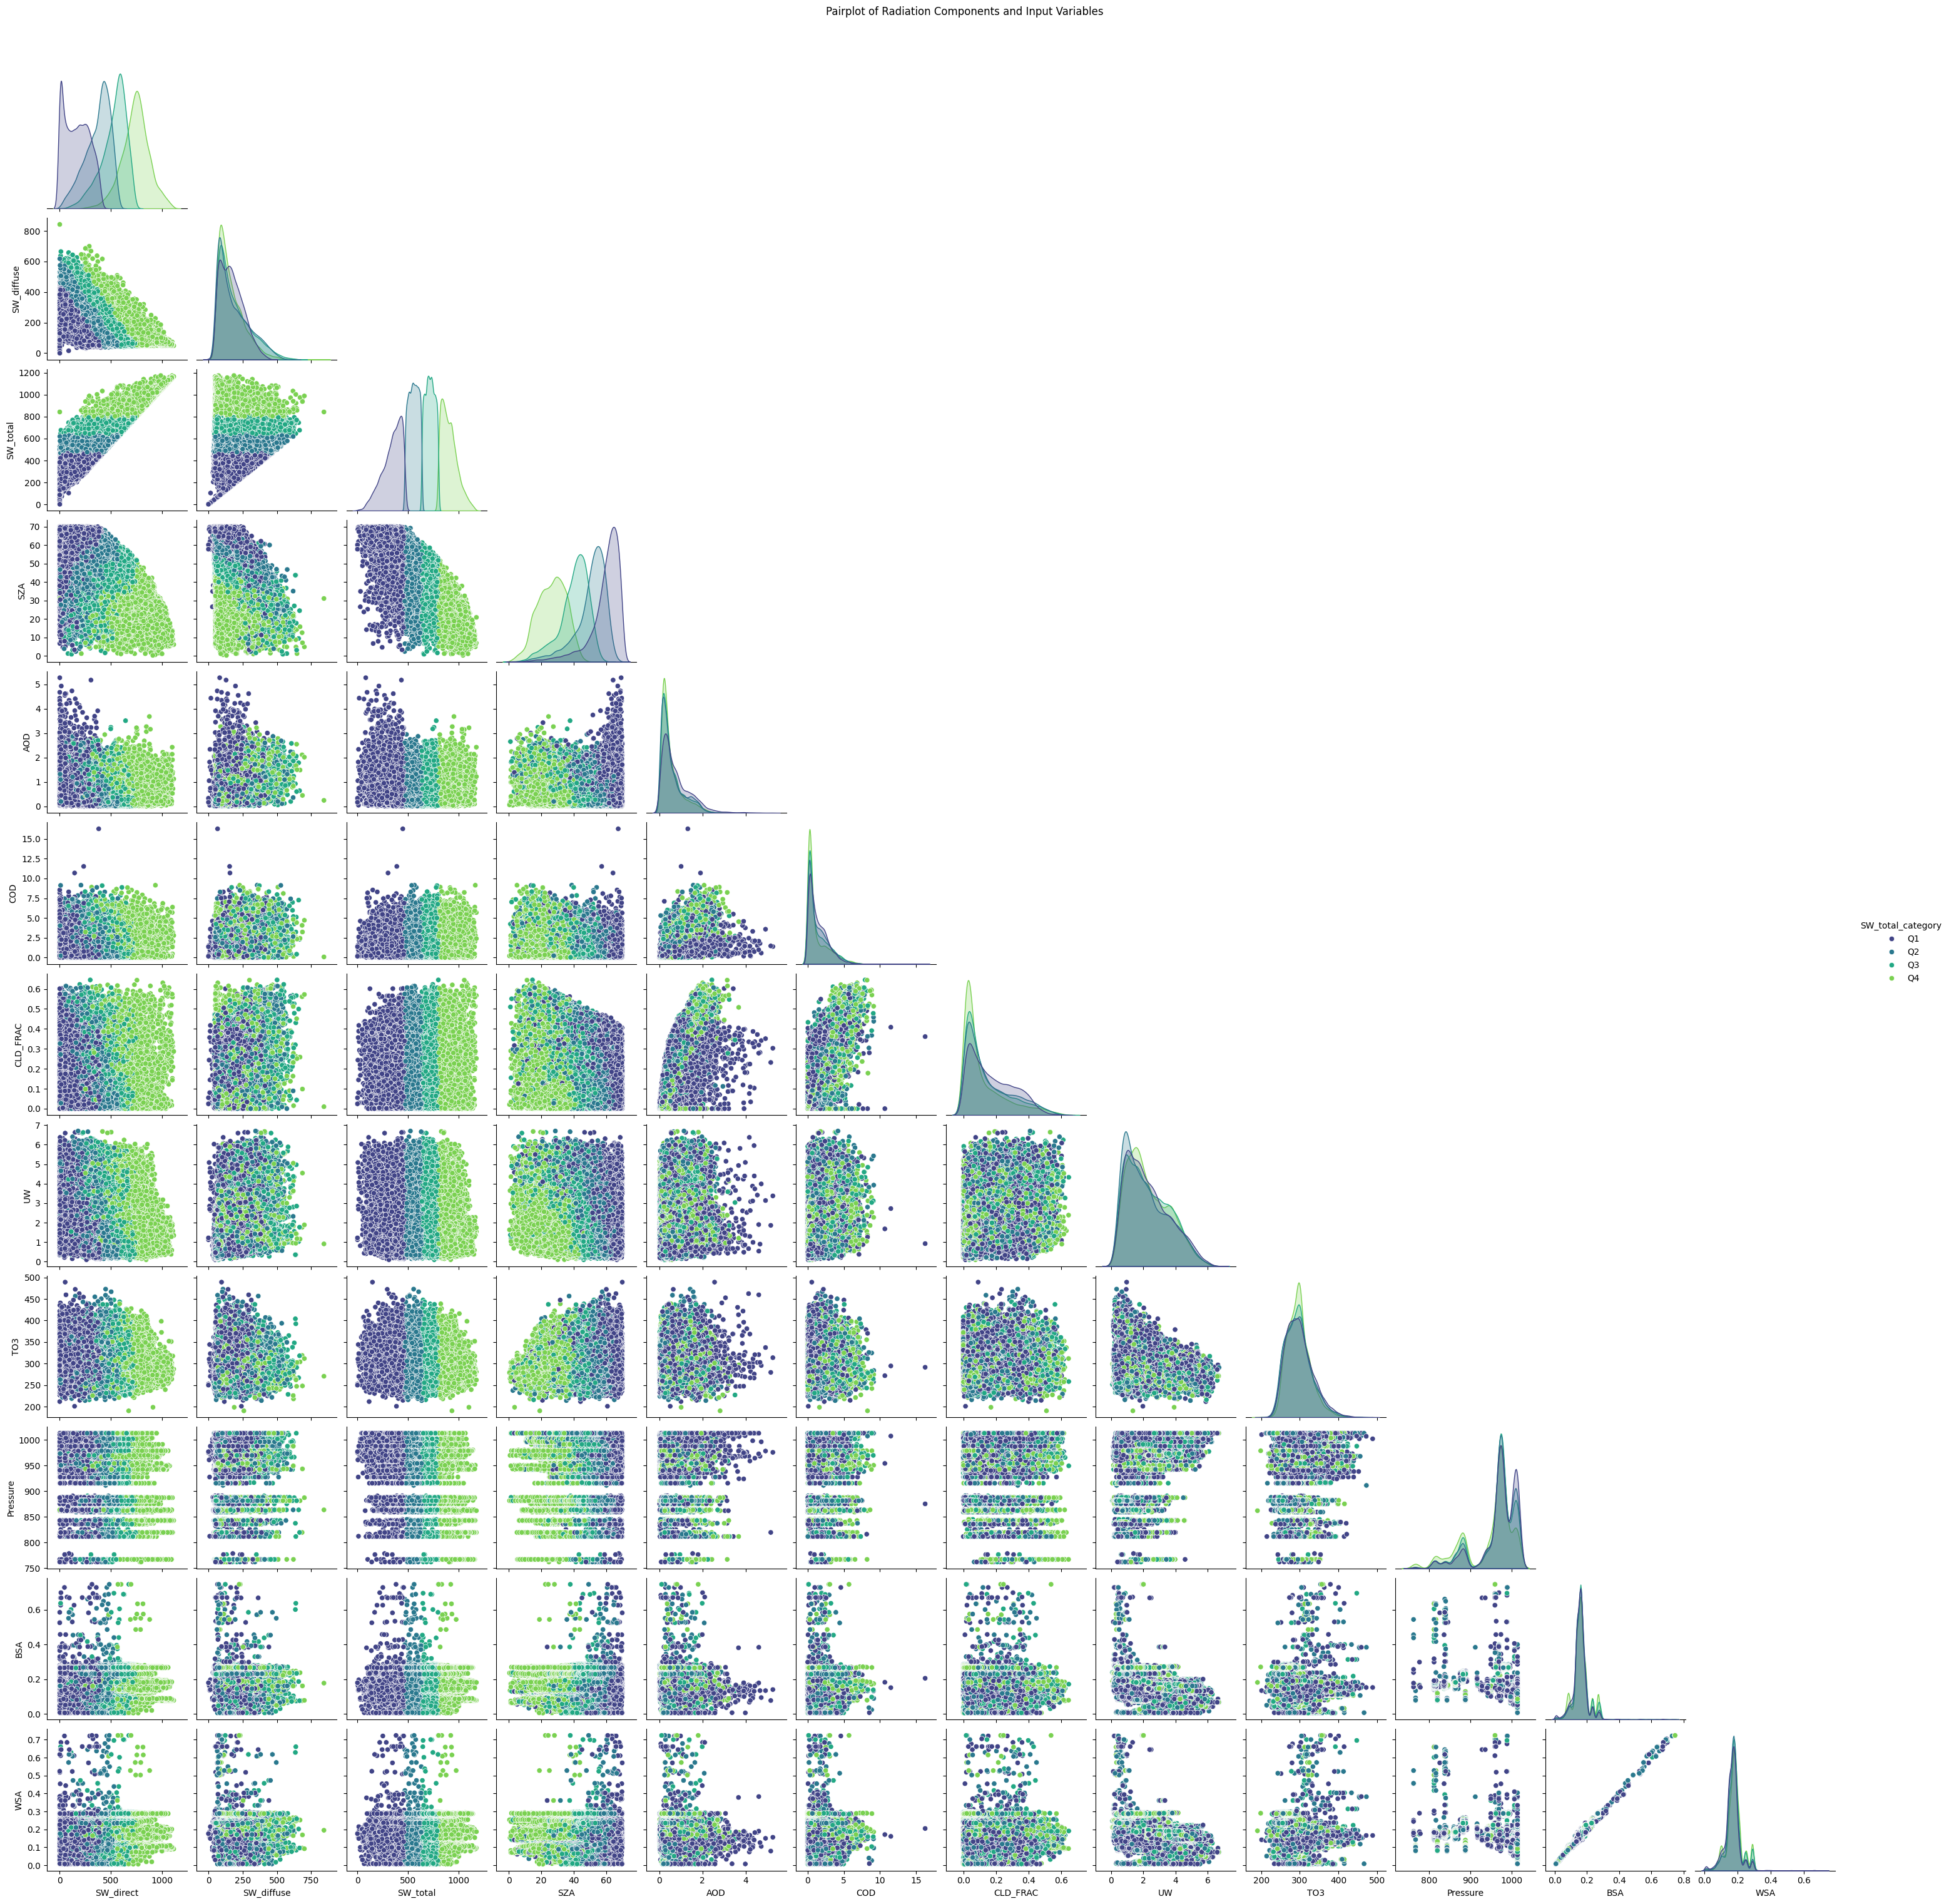

In [ ]:
# Update this if you dropped or fixed columns
columns_to_plot = ['SW_direct', 'SW_diffuse', 'SW_total'] + [
    col for col in BSRN.columns
    if col not in ['SW_total', 'SW_total_category', 'SW_direct', 'SW_diffuse']
    and BSRN[col].dtype != 'object'
]

#Plot pairplots
sns.pairplot(BSRN[columns_to_plot + ['SW_total_category']],
             hue='SW_total_category', palette='viridis', corner=True)
plt.suptitle('Pairplot of Radiation Components and Input Variables', y=1.02)
plt.show()

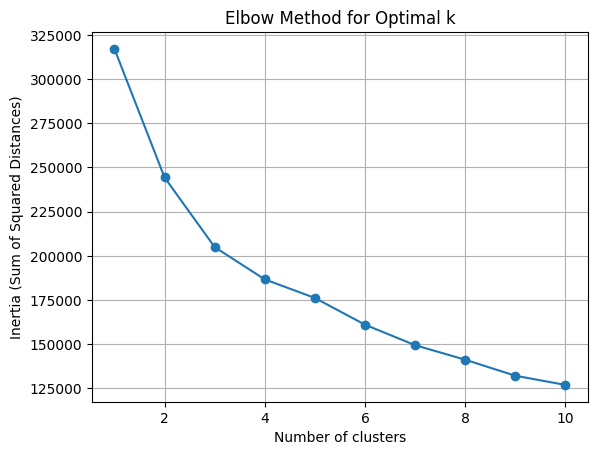

In [ ]:

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

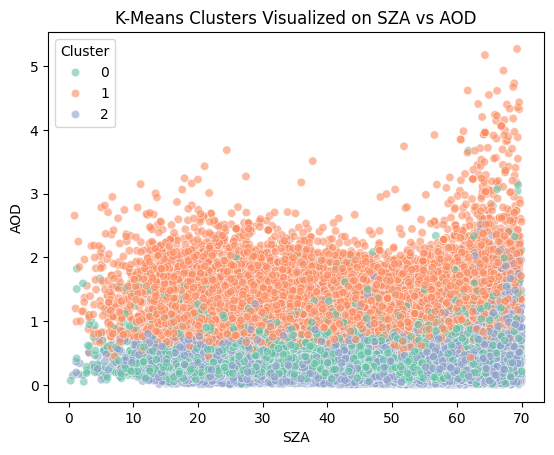

In [ ]:
#k=3 based on elbow plot
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
BSRN['cluster'] = kmeans.fit_predict(X_scaled)

#Plot clusters using SZA and AOD

sns.scatterplot(data=BSRN, x='SZA', y='AOD', hue='cluster', palette='Set2', alpha=0.6)
plt.title('K-Means Clusters Visualized on SZA vs AOD')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Crosstab to check alignment between clusters and radiation quartiles
cluster_vs_sw = pd.crosstab(BSRN['cluster'], BSRN['SW_total_category'], normalize='index')
print(cluster_vs_sw)

SW_total_category        Q1        Q2        Q3        Q4
cluster                                                  
0                  0.176171  0.219184  0.263433  0.341212
1                  0.299786  0.242872  0.239378  0.217965
2                  0.255007  0.265073  0.249817  0.230104


In [ ]:
#Cluster 0 shows low SZA and higher AOD values, correlating with low radiation levels (SW_total_category = Q1).
#Cluster 1 appears around mid-range SZA and low AOD, possibly aligning with moderate radiation levels (Q2, Q3).
#Cluster 2 clusters more tightly at low AOD and low SZA, with strong representation in Q4 — the highest radiation category.

#The clusters show clear trends that often align with SW_total_category.
#KMeans can help group atmospheric conditions with similar radiative properties. In this case it shows that solar radiation is strongly influenced by solar zenith angle and aerosol content.



In [ ]:
# Define input features (excluding SW_ vars and categorical ones)
features = BSRN.drop(columns=[col for col in BSRN.columns if col.startswith('SW_') or BSRN[col].dtype == 'object'])
target = BSRN['SW_total']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} — RMSE: {rmse:.2f}, R²: {r2:.3f}")

evaluate_model(y_test, tree_preds, "Decision Tree")
evaluate_model(y_test, forest_preds, "Random Forest")

Decision Tree — RMSE: 140.58, R²: 0.599
Random Forest — RMSE: 98.95, R²: 0.801


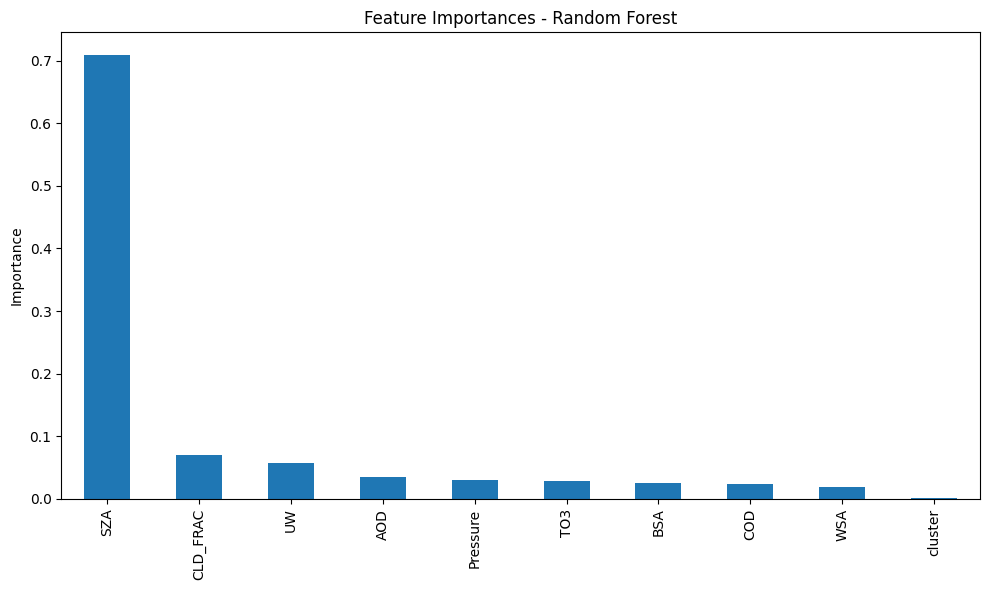

In [ ]:
# Get feature importances
importances = forest_model.feature_importances_
feature_names = features.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# Feature importance analysis from the Random Forest showed that Solar Zenith Angle (SZA) was the most influential predictors.
# This indicates that lower angles of sunlight by far reduce the amount of solar radiation the most with Cloud Fraction (CLD_FRAC) being second highest mean that more clouds mean less solar radiation


In [ ]:
# Features: all non-SW and non-categorical
X = BSRN.drop(columns=[col for col in BSRN.columns if col.startswith('SW_') or BSRN[col].dtype == 'object'])
y = BSRN['SW_total_category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
#K-nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

#Gaussian Naive Bayes

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

In [ ]:
def evaluate_classifier(y_true, y_pred, name="Model"):
    print(f"=== {name} Classification Report ===")
    print(classification_report(y_true, y_pred, digits=3))

    cm = confusion_matrix(y_true, y_pred, labels=["Q1", "Q2", "Q3", "Q4"])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Q1", "Q2", "Q3", "Q4"],
                yticklabels=["Q1", "Q2", "Q3", "Q4"])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

=== K-Nearest Neighbors Classification Report ===
              precision    recall  f1-score   support

          Q1      0.745     0.730     0.737      1764
          Q2      0.562     0.581     0.571      1746
          Q3      0.615     0.603     0.609      1760
          Q4      0.800     0.806     0.803      1775

    accuracy                          0.680      7045
   macro avg      0.681     0.680     0.680      7045
weighted avg      0.681     0.680     0.681      7045



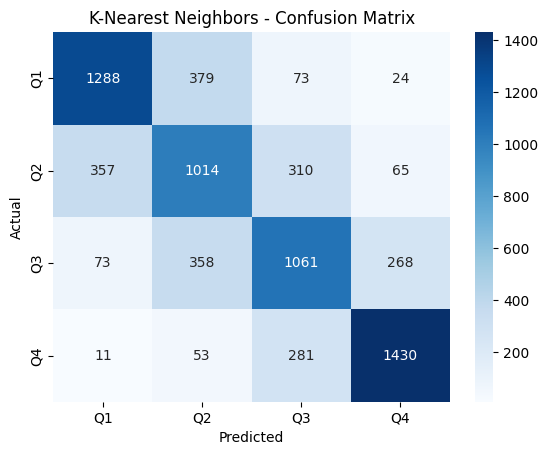

=== Gaussian Naive Bayes Classification Report ===
              precision    recall  f1-score   support

          Q1      0.773     0.701     0.735      1764
          Q2      0.549     0.591     0.569      1746
          Q3      0.543     0.545     0.544      1760
          Q4      0.763     0.773     0.768      1775

    accuracy                          0.653      7045
   macro avg      0.657     0.653     0.654      7045
weighted avg      0.658     0.653     0.655      7045



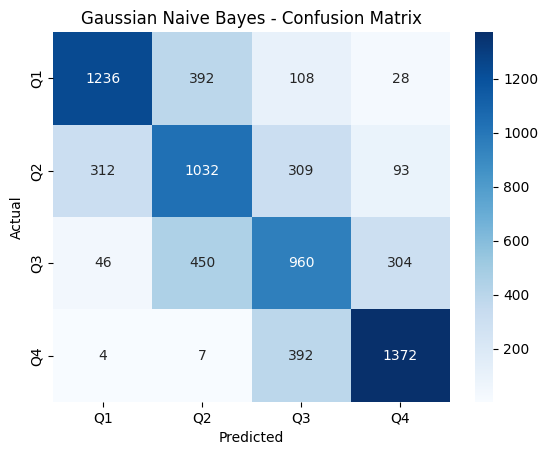

In [ ]:
evaluate_classifier(y_test, y_pred_knn, "K-Nearest Neighbors")
evaluate_classifier(y_test, y_pred_nb, "Gaussian Naive Bayes")

In [ ]:
#KNeighborsClassifier outperformed GaussianNB in predicting shortwave radiation categories having higher accuracy and better macro-avg precision, recall, and F1-scores.
#KNN’s is better at modeling the local data structure, which might capture more subtle feature interactions than Gaussian.


In [ ]:
#The most important input feature for predicting total shortwave radiation is Solar Zenith Angle #(SZA). With Cloud Fraction and Water vapor column being the next most predictive.
#These features determine how much radiation reaches the Earth’s surface.
#Clustering analysis showed distinct groups with Cluster 0 associated with high radiation (Q4) #and Cluster 1 representing low radiation (Q1). These clusters showed patterns related to SZA
#and AOD, with favorable conditions for high radiation being characterized by low SZA and low #aerosol content, and low radiation by high SZA and high aerosol content.
#For classification, K-Nearest Neighbors (KNN) outperformed GaussianNB, having better #accuracy and classification. KNN was effective at capturing non-linear relationships between #features.
#Based on these results, I recommend using KNN. These models can handle complex #interactions between features and provide better performance on challenging categories.